In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
def calculate_eddy(width=500000, L=1e5, f0=None, rho0=1025, q11=1., q22=1., q12=0.):
    if f0 is None:
        f0 = 2 * 7.29E-5 * np.sin(np.radians(-34))
    g = 9.81
    x = np.linspace(-width // 2, width // 2, 101)
    y = np.linspace(-width // 2, width // 2, 101)
    x_2d, y_2d = np.meshgrid(x, y, indexing='ij')
    
    x_c = 0
    y_c = 0

    X = np.stack([x_2d - x_c, y_2d - y_c], axis=0) 
    Q = np.array([[q11, q12], [q12, q22]]) 
    
    r_c = np.sqrt(np.einsum('i...,ij,j...->...', X, Q, X))

    sigma = -2 * np.exp(-r_c**2 / L**2)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    d_sigma_dx = np.gradient(sigma, axis=0) / dx
    d_sigma_dy = np.gradient(sigma, axis=1) / dy
    
    U = -g / f0 * d_sigma_dy
    V = g / f0 * d_sigma_dx
    
    return U, V, x/1000, y/1000

u_ICE, v_ICE, x, y = calculate_eddy()
X, Y, dx = *np.meshgrid(x, y), x[1]-x[0]

u_IEE, v_IEE, *_ = calculate_eddy(q11=2, q22=2, q12=1)

In [3]:
def matrix_maker(df, val):

    i_vals = df['i'].astype(int).to_numpy()
    j_vals = df['j'].astype(int).to_numpy()
    X_vals = df[val].to_numpy()
    
    mat = np.full((101, 101), np.nan)
    
    mat[i_vals, j_vals] = X_vals

    return mat

DOPIOE_df  = pd.read_csv("Error_Data/DOPIO_df.csv")
MOCA_df    = pd.read_csv("Error_Data/MOCA_df.csv")
ESPRA_df = pd.read_csv("Error_Data/ESPRA_df.csv")

E_DOPIOE  = matrix_maker(DOPIOE_df, 'Err')
E_MOCA    = matrix_maker(MOCA_df, 'Err')
E_ESPRA = matrix_maker(ESPRA_df, 'Err')
R_DOPIOE  = matrix_maker(DOPIOE_df, 'r')
R_MOCA    = matrix_maker(MOCA_df, 'r')
R_ESPRA = matrix_maker(ESPRA_df, 'r')

W_DOPIOE  = matrix_maker(DOPIOE_df, 'w')
# W_MOCA    = matrix_maker(MOCA_df, 'w')
# W_ESPRA = matrix_maker(ESPRA_df, 'w')
    

/scratch/pbs.6487512.kman.restech.unsw.edu.au/ipykernel_1692254/1552167797.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


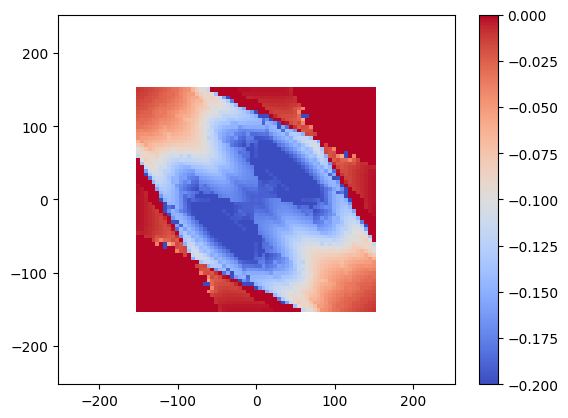

In [4]:
plt.pcolor(X, Y, W_DOPIOE.T, vmin=-.2, vmax=0, cmap='coolwarm')
plt.colorbar()


In [5]:
DOPIOE_df

,Unnamed: 0,i,j,x0,y0,w,Err,r
0,0,20.0,20.0,-148.570159,-148.570159,0.000006,210.109934,10.0
1,1,20.0,21.0,-146.304126,-147.879695,0.000007,208.022358,10.0
2,2,20.0,22.0,-149.063314,-143.796068,0.000006,207.116346,10.0
3,3,20.0,23.0,-153.573568,-153.136931,0.000010,216.877293,2.0
4,4,20.0,24.0,-153.724171,-148.517807,0.000014,213.749057,2.0
...,...,...,...,...,...,...,...,...
3716,3716,80.0,76.0,153.724171,148.517807,0.000014,213.749057,2.0
3717,3717,80.0,77.0,153.573568,153.136931,0.000010,216.877293,2.0
3718,3718,80.0,78.0,149.063314,143.796068,0.000006,207.116346,10.0
3719,3719,80.0,79.0,146.304126,147.879695,0.000007,208.022358,10.0


/scratch/pbs.6483913.kman.restech.unsw.edu.au/ipykernel_624111/1476939694.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, label='Error (km)')
/scratch/pbs.6483913.kman.restech.unsw.edu.au/ipykernel_624111/1476939694.py:43: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, label=labels[i])


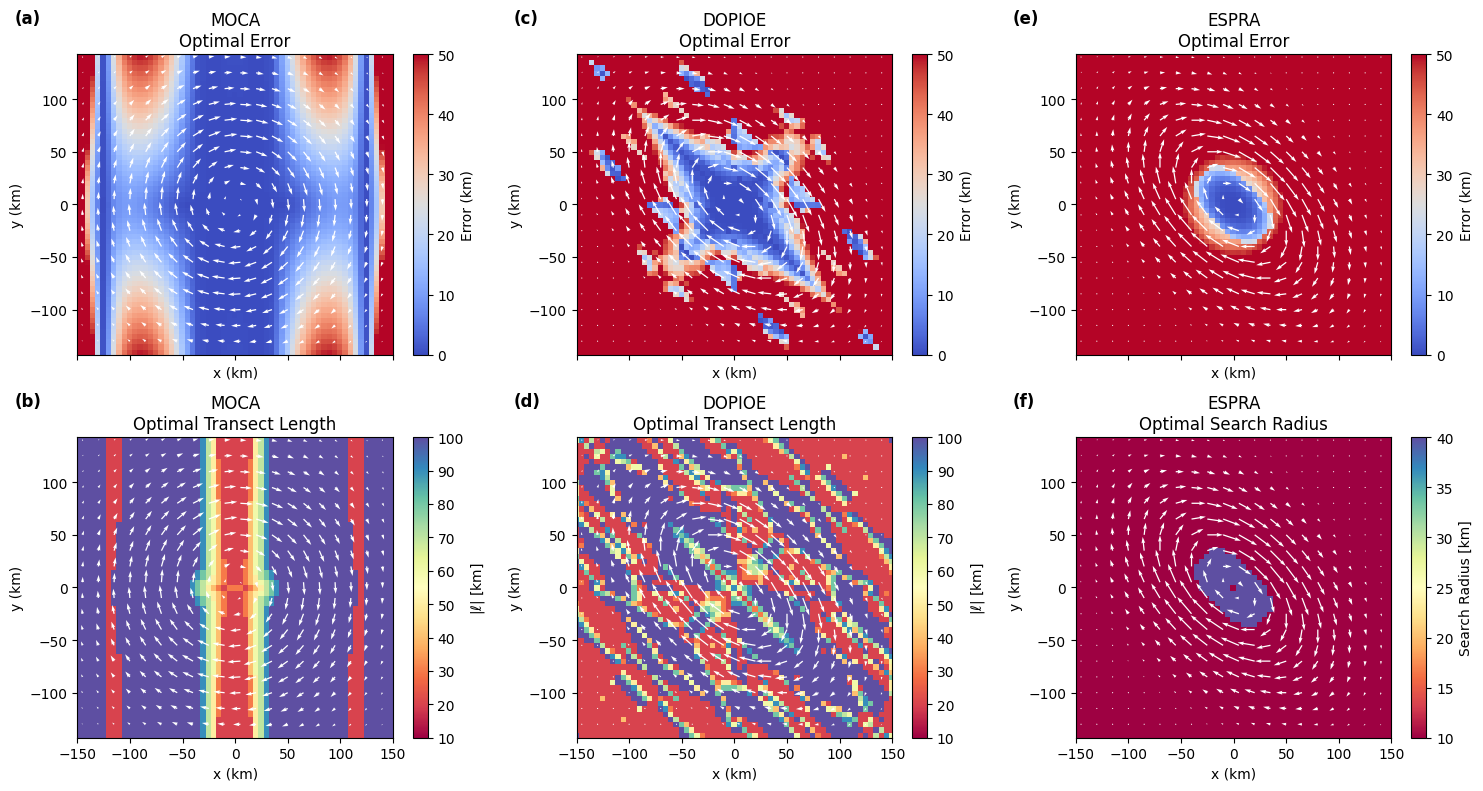

In [4]:
# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=True) #15, 8

error_mats = [E_MOCA, E_DOPIOE, E_ESPRA]
r_mats     = [2 * R_MOCA * dx, 2 * R_DOPIOE * dx, R_ESPRA * dx]
titles_E   = ['MOCA\nOptimal Error', 'DOPIOE\nOptimal Error', 'ESPRA\nOptimal Error']
titles_R   = ['MOCA\nOptimal Transect Length', 'DOPIOE\nOptimal Transect Length', 'ESPRA\nOptimal Search Radius']

labels = [r'$|\ell|$ [km]', r'$|\ell|$ [km]', 'Search Radius [km]']

# Parameters for the pcolor and quiver plots
vmin, vmax = 0, 50
spacing = 3  # spacing for quiver
width = .004
scale = 50
alpha = 1

tags = ['(a)', '(c)', '(e)', '(b)', '(d)', '(f)']

# Plot E matrices on the top row
for i, ax in enumerate(axs[0]):
    im = ax.pcolor(X, Y, error_mats[i].T, vmin=vmin, vmax=vmax, cmap='coolwarm')
    # if 'VG' in titles_E[i]:
    fig.colorbar(im, ax=ax, label='Error (km)')
    if 'MOCA' in titles_E[i]:
        ax.quiver(x[::spacing], y[::spacing],
              u_ICE[::spacing, ::spacing].T, v_ICE[::spacing, ::spacing].T,
              alpha=alpha, scale=scale, width=width, color='w')
    else:
        ax.quiver(x[::spacing], y[::spacing],
              u_IEE[::spacing, ::spacing].T, v_IEE[::spacing, ::spacing].T,
              alpha=alpha, scale=scale, width=width, color='w')
    ax.set_title(titles_E[i])
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')

    ax.text(-0.2, 1.15, tags[i], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='left')

# Plot R matrices on the bottom row
for i, ax in enumerate(axs[1]):
    im = ax.pcolor(X, Y, r_mats[i].T, vmin=2*dx, vmax=None, cmap='Spectral')
    # if 'VG' in titles_E[i]:
    fig.colorbar(im, ax=ax, label=labels[i])
    if 'MOCA' in titles_E[i]:
        ax.quiver(x[::spacing], y[::spacing],
              u_ICE[::spacing, ::spacing].T, v_ICE[::spacing, ::spacing].T,
              alpha=alpha, scale=scale, width=width, color='w')
    else:
        ax.quiver(x[::spacing], y[::spacing],
              u_IEE[::spacing, ::spacing].T, v_IEE[::spacing, ::spacing].T,
              alpha=alpha, scale=scale, width=width, color='w')
    ax.set_title(titles_R[i])
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')

    ax.text(-0.2, 1.15, tags[i+3], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='left')

for ax in axs.flat:

    ax.axis('equal')
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)

plt.tight_layout()
plt.show()


In [5]:
def get_quadrant(i, j, center):
    q1 = (i >= center[0]) & (j > center[1])
    q2 = (i < center[0]) & (j >= center[1])
    q3 = (i <= center[0]) & (j < center[1])
    q4 = ~(q1 | q2 | q3)  # Everything else (Bottom-right)

    return np.select([q1, q2, q3, q4], [1, 2, 3, 4])

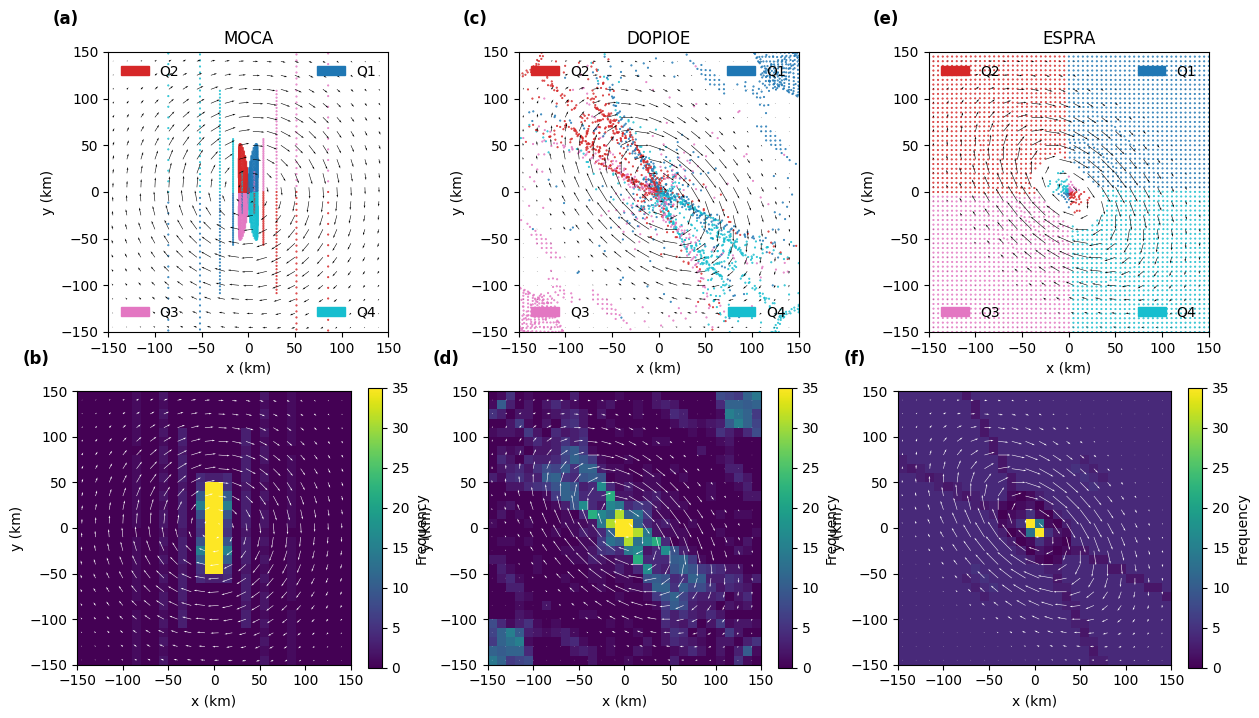

In [6]:
import matplotlib.patches as mpatches

dfs = [MOCA_df, DOPIOE_df, ESPRA_df]
titles = ['MOCA', 'DOPIOE', 'ESPRA']
spacing, width = 3, 0.002
grid_size = 10
x_bins = np.arange(-150, 151, grid_size)
y_bins = np.arange(-150, 151, grid_size)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
tags = ['(a)', '(c)', '(e)', '(b)', '(d)', '(f)']

# Top row: scatter + quiver
for i, ax in enumerate(axs[0]):
    df = dfs[i]
    x0, y0 = df['x0'].to_numpy(), df['y0'].to_numpy()
    nic, njc = df['i'].astype(int).to_numpy(), df['j'].astype(int).to_numpy()

    quad = get_quadrant(nic, njc, center=(len(x)//2, len(y)//2))


    df = pd.DataFrame({'x0': x0, 'y0': y0, 'q': quad})
    df = df.sort_values(by='y0').reset_index(drop=True)

    x0, y0, quad = df['x0'], df['y0'], df['q']


    legend_locs = {1: 'upper right', 2: 'upper left', 3: 'lower left', 4: 'lower right'}
    scatter = ax.scatter(x0, y0, marker='.', s=1, c=quad, cmap='tab10')
    unique_quads = np.append(np.unique(quad), 0)

    for q in unique_quads:
        if q == 0:
            handles_q = [mpatches.Patch(color=scatter.cmap(scatter.norm(q)), label=f'Q{q}')]
            legend = ax.legend(handles=handles_q, loc=legend_locs[1], frameon=False)
            legend.set_visible(False) # False legend to fix bug
        else:
            handles_q = [mpatches.Patch(color=scatter.cmap(scatter.norm(q)), label=f'Q{q}')]
            legend = ax.legend(handles=handles_q, loc=legend_locs[q], frameon=False)
            ax.add_artist(legend)  
    
    U, V = (u_ICE, v_ICE) if titles[i] == 'MOCA' else (u_IEE, v_IEE)
    ax.quiver(x[::spacing], y[::spacing], U[::spacing, ::spacing].T, V[::spacing, ::spacing].T,
              alpha=1, scale=50, width=width, color='k')
    ax.set_aspect('equal')
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_title(titles[i])

    ax.text(-0.2, 1.15, tags[i], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='left')

# Bottom row: heatmap + quiver
heatmaps = []
for i, ax in enumerate(axs[1]):
    df = dfs[i]
    x0, y0 = df['x0'].to_numpy(), df['y0'].to_numpy()
    H, xedges, yedges = np.histogram2d(x0, y0, bins=[x_bins, y_bins])
    im = ax.pcolormesh(xedges, yedges, H.T, cmap='viridis', shading='auto', vmin=0, vmax=35)
    heatmaps.append(im)
    
    U, V = (u_ICE, v_ICE) if titles[i] == 'MOCA' else (u_IEE, v_IEE)
    ax.quiver(x[::spacing], y[::spacing], U[::spacing, ::spacing].T, V[::spacing, ::spacing].T,
              alpha=1, scale=50, width=width, color='w')

    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    
    fig.colorbar(im, ax=ax, label='Frequency')

    ax.text(-0.2, 1.15, tags[i+3], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='left')

# plt.tight_layout()
plt.show()


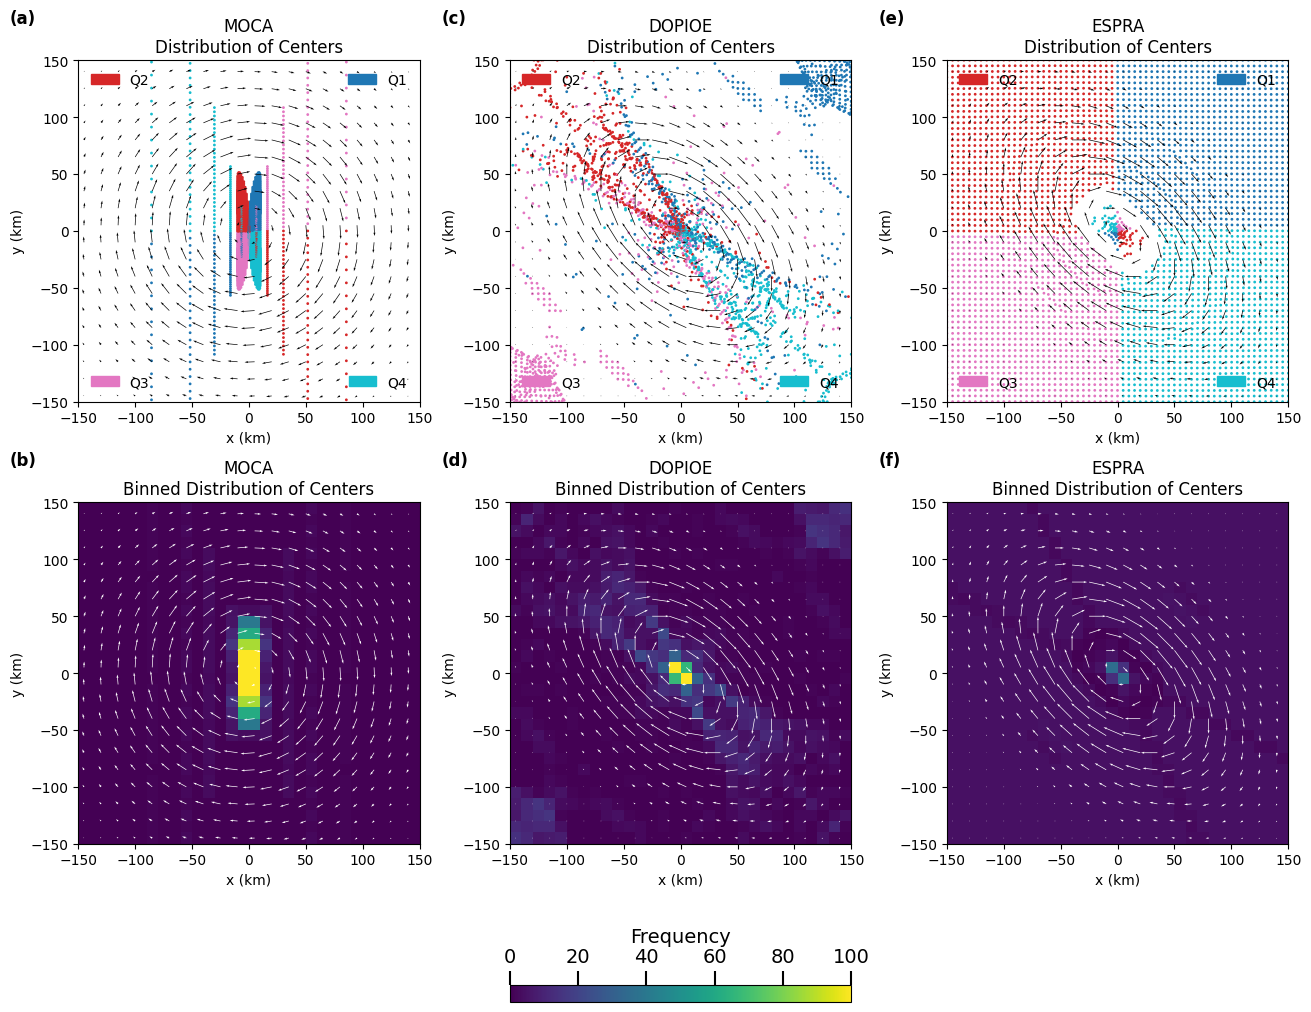

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -- your data setup here --
# dfs = [MOCA_df, DOPIOE_df, ESPRA_df]
# u_ICE, v_ICE, u_IEE, v_IEE, x, y, get_quadrant, etc.

spacing, width = 3, 0.002
grid_size = 10
x_bins = np.arange(-150, 151, grid_size)
y_bins = np.arange(-150, 151, grid_size)

fig, axs = plt.subplots(2, 3, figsize=(13, 10), constrained_layout=True)
tags = ['(a)', '(c)', '(e)', '(b)', '(d)', '(f)']
titles = ['MOCA\nDistribution of Centers', 'DOPIOE\nDistribution of Centers', 'ESPRA\nDistribution of Centers']

# Top row: scatter + quiver
for i, ax in enumerate(axs[0]):
    df = dfs[i]
    x0, y0 = df['x0'].to_numpy(), df['y0'].to_numpy()
    nic, njc = df['i'].astype(int).to_numpy(), df['j'].astype(int).to_numpy()
    quad = get_quadrant(nic, njc, center=(len(x)//2, len(y)//2))

    df2 = pd.DataFrame({'x0': x0, 'y0': y0, 'q': quad})
    df2 = df2.sort_values(by='y0').reset_index(drop=True)
    x0, y0, quad = df2['x0'], df2['y0'], df2['q']

    scatter = ax.scatter(x0, y0, s=1, c=quad, cmap='tab10')
    # build quad legends
    legend_locs = {1:'upper right', 2:'upper left', 3:'lower left', 4:'lower right'}
    unique_quads = np.append(np.unique(quad), 0)
    for q in unique_quads:
        if q == 0:
            handles_q = [mpatches.Patch(color=scatter.cmap(scatter.norm(q)), label=f'Q{q}')]
            legend = ax.legend(handles=handles_q, loc=legend_locs[1], frameon=False)
            legend.set_visible(False) # False legend to fix bug
        else:
            handles_q = [mpatches.Patch(color=scatter.cmap(scatter.norm(q)), label=f'Q{q}')]
            legend = ax.legend(handles=handles_q, loc=legend_locs[q], frameon=False)
            ax.add_artist(legend)  

    U, V = (u_ICE, v_ICE) if 'MOCA' in titles[i] else (u_IEE, v_IEE)
    ax.quiver(x[::spacing], y[::spacing],
              U[::spacing, ::spacing].T, V[::spacing, ::spacing].T,
              scale=50, width=width, color='k')
    ax.set_aspect('equal')
    ax.set_xlim(-150, 150); ax.set_ylim(-150, 150)
    ax.set_xlabel('x (km)'); ax.set_ylabel('y (km)')
    ax.set_title(titles[i])
    ax.text(-0.2, 1.15, tags[i], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top')

titles = ['MOCA\nBinned Distribution of Centers', 'DOPIOE\nBinned Distribution of Centers', 'ESPRA\nBinned Distribution of Centers']

# Bottom row: heatmap + quiver + top colorbar
for i, ax in enumerate(axs[1]):
    df = dfs[i]
    x0, y0 = df['x0'].to_numpy(), df['y0'].to_numpy()
    H, xedges, yedges = np.histogram2d(x0, y0, bins=[x_bins, y_bins])
    im = ax.pcolormesh(xedges, yedges, H.T,
                       cmap='viridis', shading='auto', vmin=0, vmax=100) #35

    if i == 1:
        # horizontal colorbar above this axes
        cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.1)
        cbar.set_label('Frequency', fontsize=14)
        # move ticks & label to top
        cbar.ax.xaxis.set_ticks_position('top')
        cbar.ax.xaxis.set_label_position('top')
        cbar.ax.tick_params(axis='x', labelsize=14, length=10, width=1.5)


    else:
        cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.1)
        cbar.ax.set_visible(False)

    U, V = (u_ICE, v_ICE) if 'MOCA' in titles[i] else (u_IEE, v_IEE)
    ax.quiver(x[::spacing], y[::spacing],
              U[::spacing, ::spacing].T, V[::spacing, ::spacing].T,
              scale=50, width=width, color='w')
    ax.set_aspect('equal')
    ax.set_xlim(-150, 150); ax.set_ylim(-150, 150)
    ax.set_xlabel('x (km)'); ax.set_ylabel('y (km)')
    ax.text(-0.2, 1.15, tags[i+3], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top')

    ax.set_title(titles[i])

plt.show()



In [38]:
300/dx

np.float64(60.0)

In [39]:
60*60

3600